Max Rettig  
CPSC 222  
Spring 2022

### Quantified Self Project: Spotify Data

##### Introduction:  
My project is focusing on Spotify data from 3/3/21-4/2/22. The dataset I am using for this project is the dataset Spotify sent me, which includes the time listened to per song, the artist of the song, the date listened to, and the song name. I chose to do Spotify because I am really interested in my listening habits and I thought this was a topic that I could handle. I also really like music, and my musical taste has changed quite significantly in the past year or so. I was hoping to observe this change through these statistics I computed. The main file I am working from is the json that was sent to me from Spotify. Certain data is kept by Spotify and if you request it, they will send you it, so that is how I acquired the data set. There are 5238 instances in my data set. I also have a hypothesis tests from my dataset- Is the average song length more than two minutes?  

The attributes in my data set are song length, song name, artist, and the date played. The classification set I am implementing is whether or not the song is over 3 minutes. I am the person most interested in my results. However, if I were to share this project with other people, I could potentially see them being interested in the different discoveries I have made and maybe they would want to do this project with their own data.

##### Data Analysis: 

In [9]:
import pandas as pd
import numpy as np
import utils
# loading the json into a pandas dataframe
stats_df = pd.read_json("spotify_hist.json")
# deleting songs with 0ms listened to
stats_df = stats_df.replace(0, np.nan).dropna(axis=0, how='any', subset=["msPlayed"]).fillna(0)
stats_df.to_csv("cleaned_spotify.csv")

I merged my Spotify data and classifier. I did this by first creating the classifier data by looping through the time each song was listened to. Then, I checked if the song was greater than 3 minutes. If it was, I added 1 to the list, and if it wasnt, I added 0 to the list. Then I added this list as a column to my spotify data set.

In [10]:
# adding a classifier to a list
classifier_list = []
for item in stats_df["msPlayed"]:
    if (item / 60000.0) > 3:
        classifier_list.append(1)
    else:
        classifier_list.append(0)

# adding this to the spotify dataframe
stats_df["over 3min"] = classifier_list
print(stats_df)

               endTime        artistName  \
0     2021-03-30 05:12           Sublime   
1     2021-04-05 22:55      Rae Sremmurd   
2     2021-04-05 22:58       Kevin Gates   
3     2021-04-05 23:02  Spillage Village   
4     2021-04-05 23:04     Isaiah Rashad   
...                ...               ...   
5233  2022-04-02 07:16         Pop Smoke   
5234  2022-04-02 07:16       Don Toliver   
5235  2022-04-02 07:19     Playboi Carti   
5236  2022-04-02 07:22         iann dior   
5237  2022-04-02 07:25         iann dior   

                                              trackName  msPlayed  over 3min  
0                                        Caress Me Down    7828.0          0  
1               Powerglide (feat. Juicy J) - From SR3MM  258600.0          1  
2                                                Me Too  185759.0          1  
3     End Of Daze (with EARTHGANG & JID feat. Jurdan...  253794.0          1  
4                                                 Nelly   82616.0          0

I caculated several statistics for my dataset. They are longest song, total minutes listened to, average time per song, median time per song, standard deviaton of time listened, song and artist mode, and average time listened to per artist.

In [11]:
# total time listened to based on artist name
artist_df = stats_df.groupby("artistName").sum()
sum = 0
for item in artist_df["msPlayed"]:
    sum += item
sum /= 60000.0
print("Sum:", round(sum, 2), "minutes")
print("Average song length:", round((sum / len(stats_df)), 2), "minutes")

Sum: 9826.95 minutes
Average song length: 1.92 minutes


As you can see, the average song length just under 2 minutes. This could be the case because I generally listen to shorter songs, or that I am skipping to the next song before most songs are over. Also, the time I listened to music is a little over 9800 minutes. 

In [12]:
utils.longest_song(stats_df)

Longest song: 8.92 minutes


In [13]:
# computing the median amount of time listened to
time_df = stats_df["msPlayed"]
median = round((time_df.median() / 60000.0), 2)
print("Median time per song:", median, "minutes")

Median time per song: 2.19 minutes


In [14]:
# computing the standard deviation of time listened to
stdev_time = round((time_df.std() / 60000.0), 2)
print("Stdev time listened to:", stdev_time, "minutes")

Stdev time listened to: 1.64 minutes


In [15]:
# computing the most listened to song
# as you can see, my most listened to song was "Sativa"
song_df = stats_df["trackName"]
song_mode = song_df.mode()
print("Song mode:", song_mode)

Song mode: 0    Sativa
Name: trackName, dtype: object


In [16]:
# average time listened to per artist
print("Average time per artist", round((sum / len(artist_df)), 2))

Average time per artist 15.75


The average time listened to per artist is only 15 minutes. This shows that I really jump around a lot and try new artists frequently.

Hypothesis test- Is the average song length more than than 2 minutes?  

In [17]:
utils.hypothesis_test(stats_df)

Reject H0


We reject the null hypothesis, so this agrees with my above calculation.

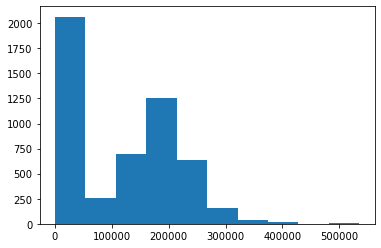

In [18]:
utils.histogram_chart_example(stats_df["msPlayed"])

With this plot, I wanted to show that I am skipping a lot more songs than I am acutally listening to, which I completely agree with. Also, it looks like there aren't many songs over 250000ms (just over 4 minutes), so It appears I am listening to shorter songs overall.

##### Conclusion:  
I used Spotify data to calculate statistics and be able to form conclusions about my data. However, I wish I had more data as there were many days where I didn't listen to music. If I did, I would have had more accurate statistics from my dataset. I am not really sure what impact this could have, but if anyone looked at my project, they could determine that everyone has a right to their own personal data. I could not figure out how to do a classification because I didn't know how to make numeric values out of my dataset.

Links: https://codereview.stackexchange.com/questions/185389/dropping-rows-from-a-pandas-dataframe-where-some-of-the-columns-have-value-0